In [1]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 120kB/s 
     |████████████████████████████████| 3.8MB 24.5MB/s 
     |████████████████████████████████| 450kB 43.0MB/s 
     |████████████████████████████████| 81kB 6.9MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
2.0.0


In [0]:
# Additional Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:', x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# the data is only 2d
# convolutional layer expects HxWxC
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes (find number of unique elements using set)
K = len(set(y_train))
print('number of classes: ',K)

number of classes:  10


In [0]:
# build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [7]:
# Compile and fit
# note: make sure we are using a GPU enabled notebook for this
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 41s 686us/sample - loss: 0.5121 - accuracy: 0.8098 - val_loss: 0.3809 - val_accuracy: 0.8582
Epoch 2/15
60000/60000 [==============================] - 41s 684us/sample - loss: 0.3547 - accuracy: 0.8669 - val_loss: 0.3412 - val_accuracy: 0.8735
Epoch 3/15
60000/60000 [==============================] - 41s 690us/sample - loss: 0.3060 - accuracy: 0.8854 - val_loss: 0.3112 - val_accuracy: 0.8824
Epoch 4/15
60000/60000 [==============================] - 40s 669us/sample - loss: 0.2765 - accuracy: 0.8949 - val_loss: 0.3046 - val_accuracy: 0.8901
Epoch 5/15
60000/60000 [==============================] - 40s 665us/sample - loss: 0.2534 - accuracy: 0.9037 - val_loss: 0.3102 - val_accuracy: 0.8832
Epoch 6/15
60000/60000 [==============================] - 40s 669us/sample - loss: 0.2325 - accuracy: 0.9111 - val_loss: 0.2969 - val_accuracy: 0.8926
Epoch 7/15
60000/60000 [====================

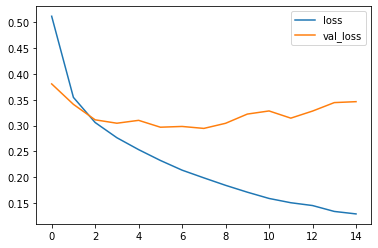

In [9]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

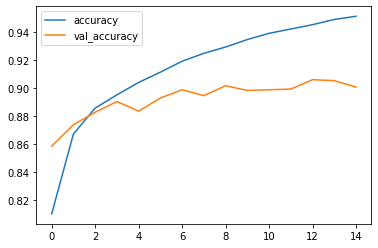

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confustion matrix, without normalization
[[875   0  29  17   2   0  70   0   7   0]
 [  3 978   0  13   3   0   1   0   2   0]
 [ 17   1 835  10  73   0  63   0   1   0]
 [ 19  13  18 893  30   1  24   0   2   0]
 [  0   1  36  21 875   0  65   0   2   0]
 [  0   0   0   0   0 981   0  13   0   6]
 [118   2  58  18 111   0 681   0  12   0]
 [  0   0   0   1   0  17   0 965   0  17]
 [  5   1   8   1   4   0   8   4 968   1]
 [  1   0   0   0   0   4   0  42   0 953]]


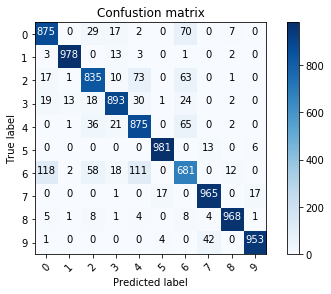

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confustion matrix',cmap=plt.cm.Blues):
  ###
  # This function prints and plots the confustion matrix
  # Normalization can be applied by setting 'normalize=True' 
  ###
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confustion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()  / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i, format(cm[i,j],fmt),
        horizontalalignment='center',
        color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
# label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

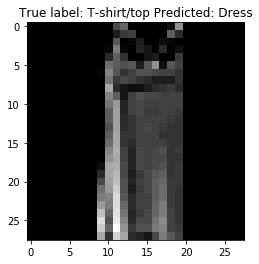

In [15]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]],labels[p_test[i]]));